In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [6]:
df =  pd.read_csv("../../Data/DR3/espectros_normalizados_balanceados_SNG_1.csv")

In [9]:
df =  df.rename(columns={'col344': "id"})

In [10]:
# separar las características (X) y la etiqueta (y)
X = df.drop('id', axis=1)
y = df['id']


In [11]:
# codificar la etiqueta (y)
encoder = LabelEncoder()
y = encoder.fit_transform(y)


In [12]:

# dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [13]:
# crear el modelo
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(3, activation='softmax')
])

# compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [14]:
# entrenar el modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
76/76 [==============================] - 3s 7ms/step - loss: 0.7096 - accuracy: 0.7082 - val_loss: 0.5214 - val_accuracy: 0.8138
Epoch 2/50
76/76 [==============================] - 0s 4ms/step - loss: 0.5511 - accuracy: 0.7923 - val_loss: 0.4919 - val_accuracy: 0.8287
Epoch 3/50
76/76 [==============================] - 0s 5ms/step - loss: 0.4949 - accuracy: 0.8256 - val_loss: 0.4153 - val_accuracy: 0.8353
Epoch 4/50
76/76 [==============================] - 0s 5ms/step - loss: 0.4431 - accuracy: 0.8446 - val_loss: 0.3688 - val_accuracy: 0.8649
Epoch 5/50
76/76 [==============================] - 0s 5ms/step - loss: 0.3849 - accuracy: 0.8603 - val_loss: 0.3404 - val_accuracy: 0.8880
Epoch 6/50
76/76 [==============================] - 0s 4ms/step - loss: 0.3536 - accuracy: 0.8772 - val_loss: 0.3055 - val_accuracy: 0.9012
Epoch 7/50
76/76 [==============================] - 0s 4ms/step - loss: 0.3545 - accuracy: 0.8817 - val_loss: 0.2971 - val_accuracy: 0.9176
Epoch 8/50
76/76 [==

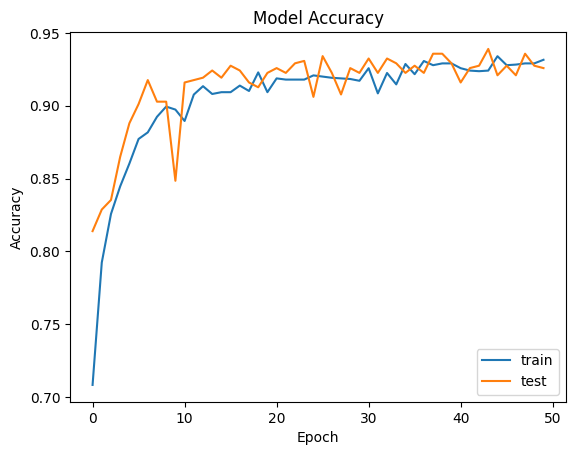

In [15]:
# graficar la precisión de entrenamiento y prueba
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [16]:
y=df['id']
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df = pd.DataFrame(y)
encoder = LabelEncoder()
df['codificado'] = encoder.fit_transform(df['id'])

nombres_etiquetas = encoder.classes_
nuevos_nombres = ['Symbiotics', 'Planetary Nebulae', 'Red Giants']
nombres_etiquetas_dict = {nombres_etiquetas[i]: nuevos_nombres[i] for i in range(len(nombres_etiquetas))}
df['nombres_etiquetas'] = df['id'].map(nombres_etiquetas_dict)

df_agrupado = df.groupby('nombres_etiquetas')['codificado'].mean()
print(df_agrupado)

nombres_etiquetas
Planetary Nebulae    1.0
Red Giants           2.0
Symbiotics           0.0
Name: codificado, dtype: float64


In [17]:
# predecir las probabilidades para los datos de prueba
y_probs = model.predict(X_test)
y_pred = np.argmax(y_probs, axis=-1)
cm = confusion_matrix(y_test, y_pred)
print(cm)

19/19 [==============================] - 0s 2ms/step
[[189   3   7]
 [ 11 168  24]
 [  0   0 205]]


In [18]:
report = classification_report(y_test, y_pred, digits=4)
print(report)

              precision    recall  f1-score   support

           0     0.9450    0.9497    0.9474       199
           1     0.9825    0.8276    0.8984       203
           2     0.8686    1.0000    0.9297       205

    accuracy                         0.9259       607
   macro avg     0.9320    0.9258    0.9252       607
weighted avg     0.9317    0.9259    0.9250       607



In [19]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9258649093904449


In [20]:
print("size of the splits")
print("X_train: ",  X_train.shape)
print("X_test: ",  X_test.shape)
print("y_test: ",  y_test.size)
print("y_pred: ",  y_pred.size)

size of the splits
X_train:  (2426, 343)
X_test:  (607, 343)
y_test:  607
y_pred:  607
